A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Fourth round of experiments after procedure upgrade adding 8th camera, and switching some camera positions.

Using a gain of 4.27 dB to raise apparent full well to 20000 e-, and sensitivity to 4.88 e-/DN.
Reducing Blacklevel to 8 DN from 128 DN, to increase sensitive range.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
D

In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1699.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0038554444909095764
Exposure set to 0.003855000017210841 (err of 4.4454495943873837e-07
Trial 1:
Imaging with Exposure: 0.003855000017210841 s
+Good exposure 0.003855000017210841 Image recieved
Quantile: 3228.0, Target: 3275.2000000000003
Exposure current Value: 0.003855000017210841
Exposure Value set to 0.003911368083208799
Exposure set to 0.003911000210791826 (err of 3.6783641044983023e-07
Trial 2:
Imaging with Exposure: 0.003911000210791826 s
+Good exposure 0.003911000210791826 Image recieved
Quantile: 3271.0, Target: 3275.2000000000003
Exposure current Value: 0.003911000210791

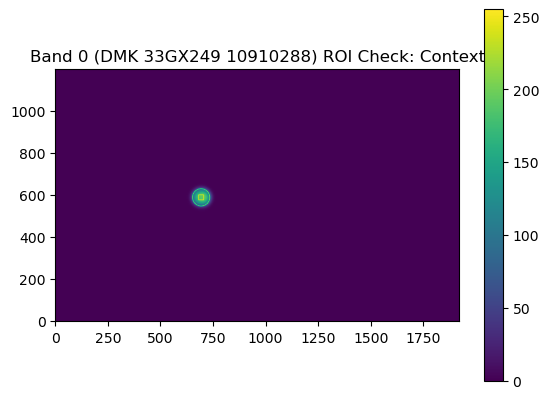

Imaging with Exposure: 0.0039029999170452356 s
+Good exposure 0.0039029999170452356 Image recieved


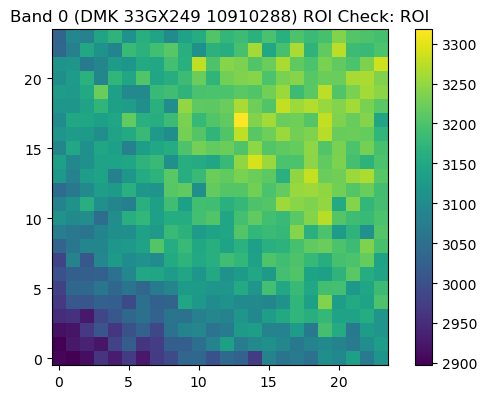

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1160.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.00564689701423049
Exposure set to 0.005646000150591135 (err of 8.966693461976219e-07
Trial 1:
Imaging with Exposure: 0.005646000150591135 s
+Good exposure 0.005646000150591135 Image recieved
Quantile: 3205.0, Target: 3275.2000000000003
Exposure current Value: 0.005646000150591135
Exposure Value set to 0.005769665818661451
Exposure set to 0.005768999923020601 (err of 6.661279048549712e-07
Trial 2:
Imaging with Exposure: 0.005768999923020601 s
+Good exposure 0.005768999923020601 Image recieved
Quantile: 3278.0, Target: 3275.2000000000003
Exposure 

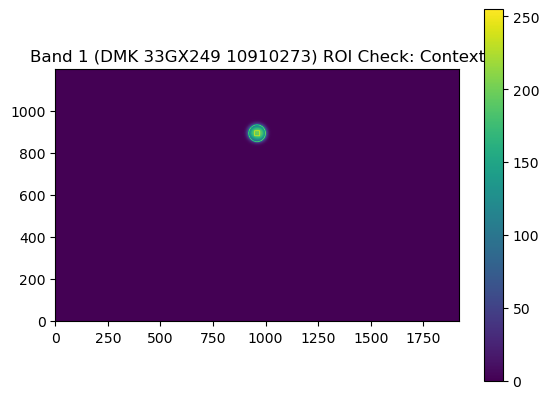

Imaging with Exposure: 0.0057669999077916145 s
+Good exposure 0.0057669999077916145 Image recieved


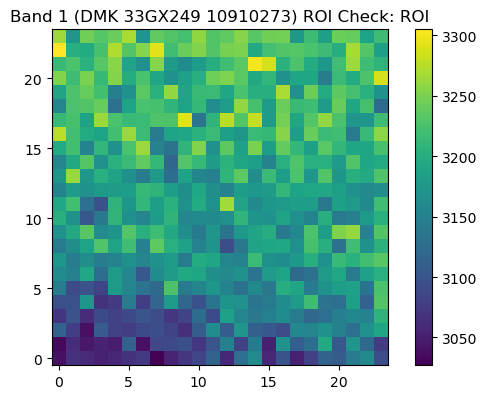

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3551.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0018446635222062469
Exposure set to 0.0018439999548718333 (err of 6.636078224233916e-07
Trial 1:
Imaging with Exposure: 0.0018439999548718333 s
+Good exposure 0.0018439999548718333 Image recieved
Quantile: 3262.0, Target: 3275.2000000000003
Exposure current Value: 0.0018439999548718333
Exposure Value set to 0.0018514618277549744
Exposure set to 0.001851000008173287 (err of 4.618717151952476e-07
Trial 2:
Imaging with Exposure: 0.001851000008173287 s
+Good exposure 0.001851000008173287 Image recieved
Quantile: 3264.0, Target: 3275.2000000000003
Ex

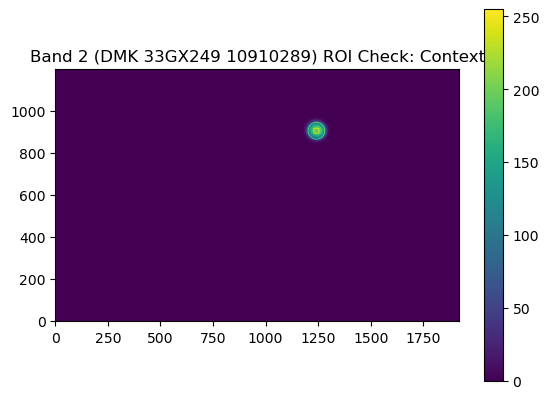

Imaging with Exposure: 0.0018619999755173922 s
+Good exposure 0.0018619999755173922 Image recieved


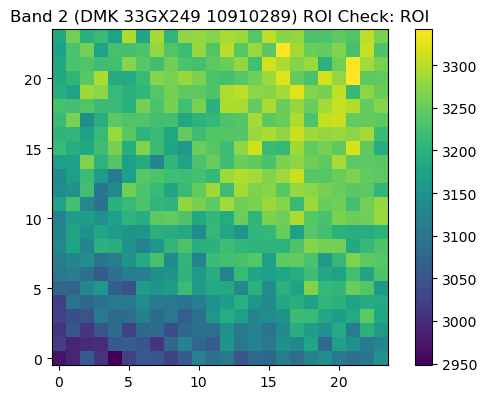

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 402.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.08147264271974564
Exposure set to 0.0814720019698143 (err of 6.387158486970135e-07
Trial 1:
Imaging with Exposure: 0.0814720019698143 s
+Good exposure 0.0814720019698143 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0814720019698143
Exposure Value set to 0.013035519979894161
Exposure set to 0.013035000301897526 (err of 5.200132727617435e-07
Trial 2:
Imaging with Exposure: 0.013035000301897526 s
+Good exposure 0.013035000301897526 Image recieved
Quantile: 2520.0, Target: 3275.2000000000003
Exposure current V

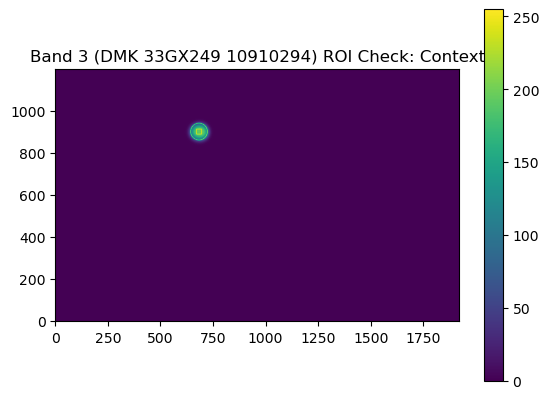

Imaging with Exposure: 0.01705300062894821 s
+Good exposure 0.01705300062894821 Image recieved


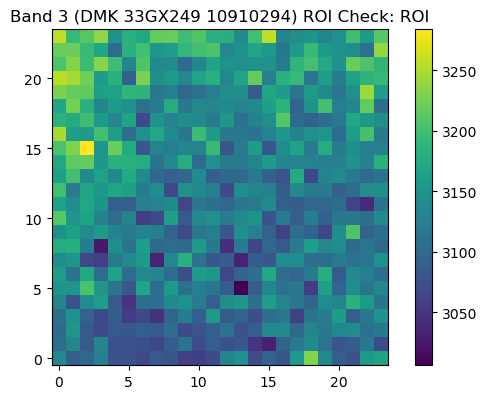

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1854.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0035331177059561014
Exposure set to 0.0035329998936504126 (err of 1.1785776668883988e-07
Trial 1:
Imaging with Exposure: 0.0035329998936504126 s
+Good exposure 0.0035329998936504126 Image recieved
Quantile: 3231.0, Target: 3275.2000000000003
Exposure current Value: 0.0035329998936504126
Exposure Value set to 0.00358133134432137
Exposure set to 0.0035810000263154507 (err of 3.3121840254139376e-07
Trial 2:
Imaging with Exposure: 0.0035810000263154507 s
+Good exposure 0.0035810000263154507 Image recieved
Quantile: 3286.0, Target: 3275.2000000000003

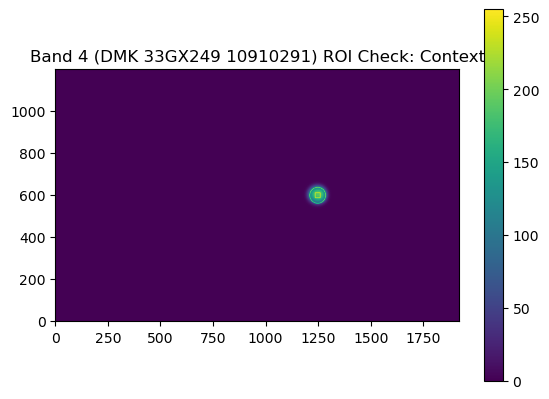

Imaging with Exposure: 0.003579000011086464 s
+Good exposure 0.003579000011086464 Image recieved


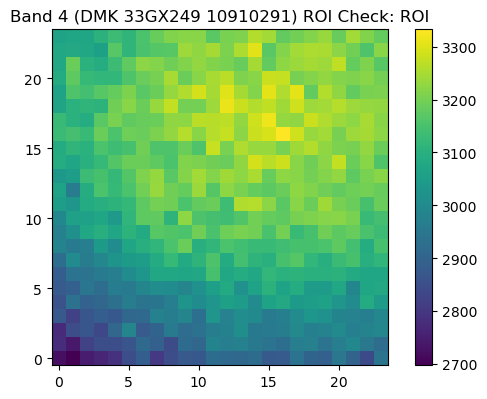

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 706.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009278187528252602
Exposure set to 0.009278000332415104 (err of 1.8707711365792412e-07
Trial 1:
Imaging with Exposure: 0.009278000332415104 s
+Good exposure 0.009278000332415104 Image recieved
Quantile: 3166.0, Target: 3275.2000000000003
Exposure current Value: 0.009278000332415104
Exposure Value set to 0.009598012082278728
Exposure set to 0.009597999975085258 (err of 1.2244979792283561e-08
Trial 2:
Imaging with Exposure: 0.009597999975085258 s
+Good exposure 0.009597999975085258 Image recieved
Quantile: 3292.0, Target: 3275.2000000000003
Exposur

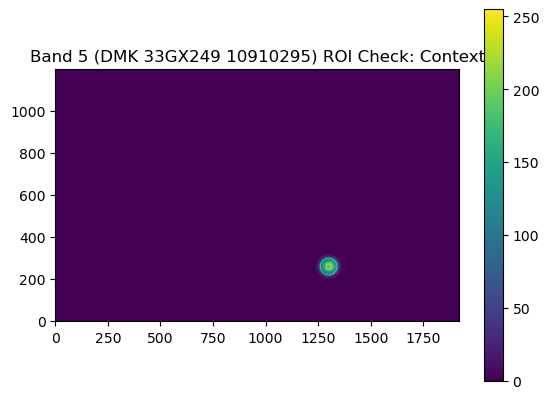

Imaging with Exposure: 0.009589999914169312 s
+Good exposure 0.009589999914169312 Image recieved


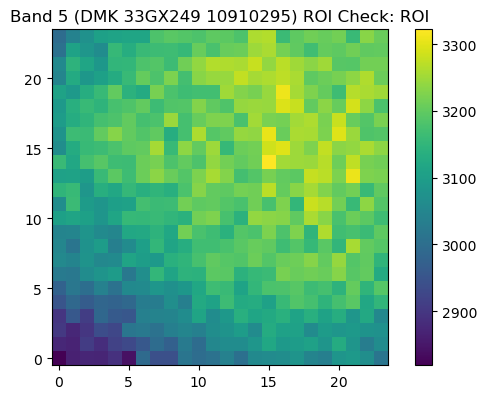

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 349.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09384527802467346
Exposure set to 0.09384500235319138 (err of 2.743105236013843e-07
Trial 1:
Imaging with Exposure: 0.09384500235319138 s
+Good exposure 0.09384500235319138 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.09384500235319138
Exposure Value set to 0.015015200711786747
Exposure set to 0.01501499954611063 (err of 2.008303999906369e-07
Trial 2:
Imaging with Exposure: 0.01501499954611063 s
+Good exposure 0.01501499954611063 Image recieved
Quantile: 2505.0, Target: 3275.2000000000003
Exposure current 

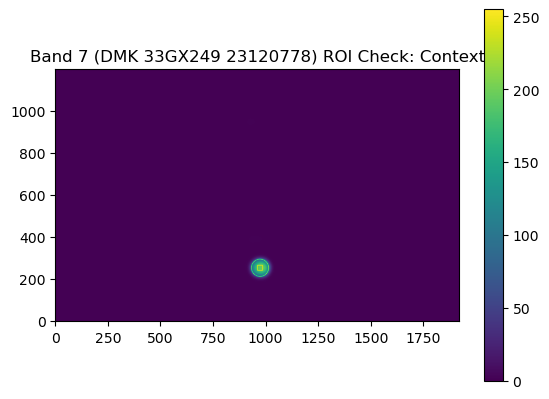

Imaging with Exposure: 0.019863000139594078 s
+Good exposure 0.019863000139594078 Image recieved


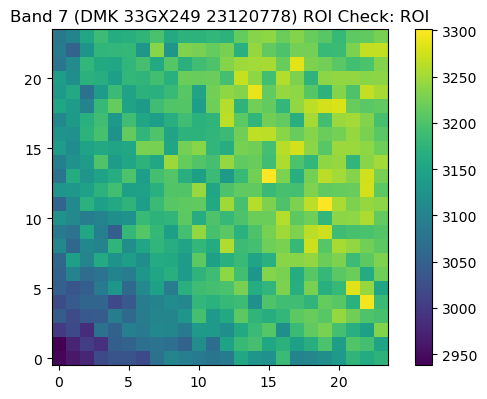

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3849.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.001701844739727676
Exposure set to 0.0017010000301524997 (err of 8.446856509052546e-07
Trial 1:
Imaging with Exposure: 0.0017010000301524997 s
+Good exposure 0.0017010000301524997 Image recieved
Quantile: 3285.0, Target: 3275.2000000000003
Exposure current Value: 0.0017010000301524997
Exposure Value set to 0.0016959254862740636
Exposure set to 0.0016949999844655395 (err of 9.255250490625318e-07
Trial 2:
Imaging with Exposure: 0.0016949999844655395 s
+Good exposure 0.0016949999844655395 Image recieved
Quantile: 3244.0, Target: 3275.2000000000003


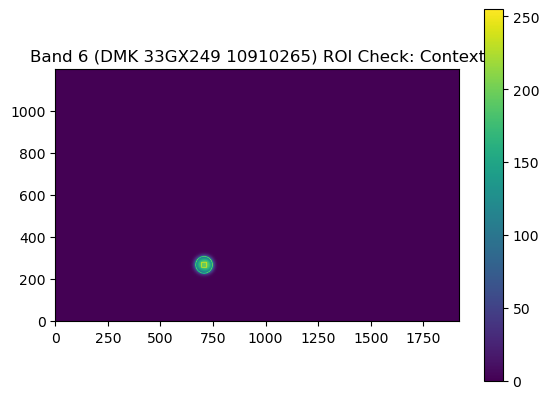

Imaging with Exposure: 0.0017109999898821115 s
+Good exposure 0.0017109999898821115 Image recieved


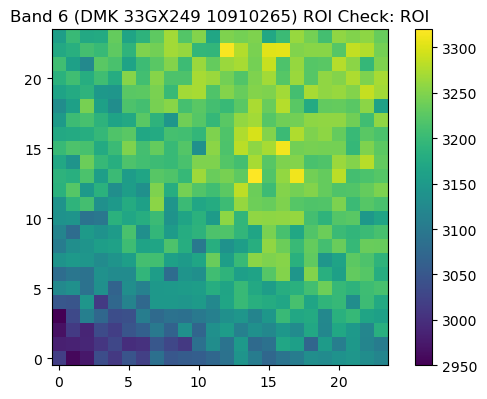

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=24)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1703.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0038463890086859465
Exposure set to 0.003845999948680401 (err of 3.889597912994265e-07
Trial 1:
Imaging with Exposure: 0.003845999948680401 s
+Good exposure 0.003845999948680401 Image recieved
Quantile: 3231.0, Target: 3275.2000000000003
Exposure current Value: 0.003845999948680401
Exposure Value set to 0.003898613154888153
Exposure set to 0.0038980001118034124 (err of 6.130209474542771e-07
Trial 2:
Imaging with Exposure: 0.0038980001118034124 s
+Good exposure 0.0038980001118034124 Image recieved
Quantile: 3271.0, Target: 3275.2000000000003
Exposure current Value: 0.0038980001118034124
Exposure Value se

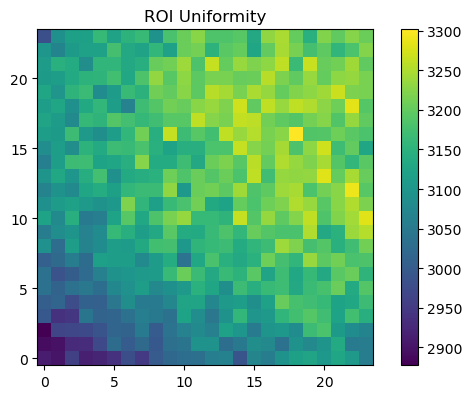

ROI Uniformity: 2.447107409654852 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1158.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005656649824231863
Exposure set to 0.005656000226736069 (err of 6.494374498603253e-07
Trial 1:
Imaging with Exposure: 0.005656000226736069 s
+Good exposure 0.005656000226736069 Image recieved
Quantile: 3217.0, Target: 3275.2000000000003
Exposure current Value: 0.005656000226736069
Exposure Value set to 0.005758325103670359
Exposure set to 0.005758000072091818 (err of 3.250577204211291e-07
Trial 2:
Imaging with Exposure: 0.005758000072091818 s
+Good exposure 0.005758000072091818 Image recieved
Quantile: 3261.0, Target: 3275.200000000

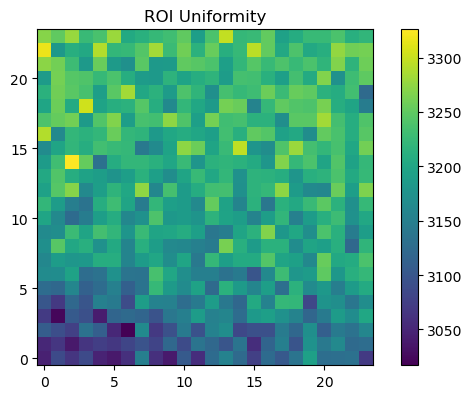

ROI Uniformity: 1.6798543400367705 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3550.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0018451832002028823
Exposure set to 0.0018449999624863267 (err of 1.8322374671707158e-07
Trial 1:
Imaging with Exposure: 0.0018449999624863267 s
+Good exposure 0.0018449999624863267 Image recieved
Quantile: 3267.0, Target: 3275.2000000000003
Exposure current Value: 0.0018449999624863267
Exposure Value set to 0.0018496308475732803
Exposure set to 0.0018489999929443002 (err of 6.308234423595994e-07
Trial 2:
Imaging with Exposure: 0.0018489999929443002 s
+Good exposure 0.0018489999929443002 Image recieved
Quantile: 3266.0, Target: 327

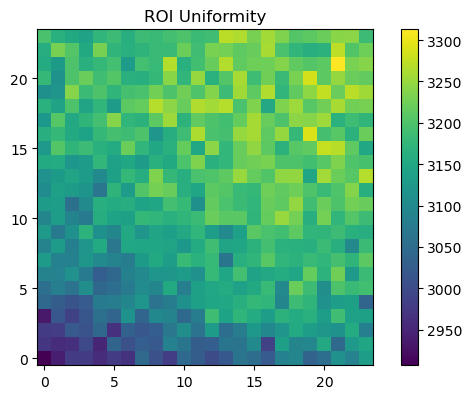

ROI Uniformity: 2.2033916928917745 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 401.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.08167581260204315
Exposure set to 0.08167500048875809 (err of 8.13864450208146e-07
Trial 1:
Imaging with Exposure: 0.08167500048875809 s
+Good exposure 0.08167500048875809 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.08167500048875809
Exposure Value set to 0.013067999854683876
Exposure set to 0.013066999614238739 (err of 1.0004639625551398e-06
Trial 2:
Imaging with Exposure: 0.013066999614238739 s
+Good exposure 0.013066999614238739 Image recieved
Quantile: 2527.0, Target: 3275.2000000000003


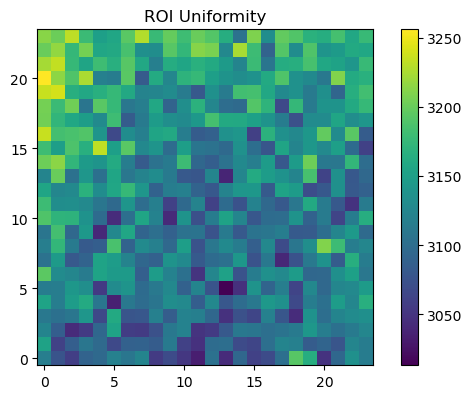

ROI Uniformity: 1.3420204296216791 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1857.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003527409862726927
Exposure set to 0.003527000080794096 (err of 4.098875027837637e-07
Trial 1:
Imaging with Exposure: 0.003527000080794096 s
+Good exposure 0.003527000080794096 Image recieved
Quantile: 3237.0, Target: 3275.2000000000003
Exposure current Value: 0.003527000080794096
Exposure Value set to 0.0035686222836375237
Exposure set to 0.003567999927327037 (err of 6.224590235418687e-07
Trial 2:
Imaging with Exposure: 0.003567999927327037 s
+Good exposure 0.003567999927327037 Image recieved
Quantile: 3282.0, Target: 3275.2000000

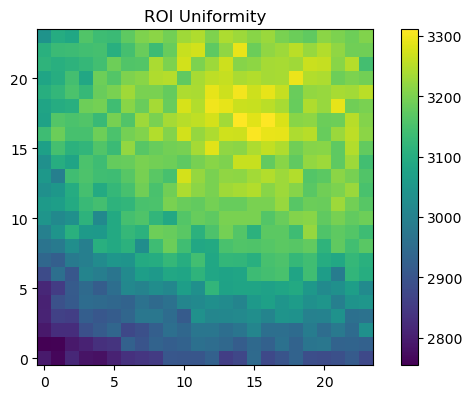

ROI Uniformity: 3.9542639874984786 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 703.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009317781776189804
Exposure set to 0.009317000396549702 (err of 7.809848547157133e-07
Trial 1:
Imaging with Exposure: 0.009317000396549702 s
+Good exposure 0.009317000396549702 Image recieved
Quantile: 3189.0, Target: 3275.2000000000003
Exposure current Value: 0.009317000396549702
Exposure Value set to 0.009568843059241772
Exposure set to 0.009568000212311745 (err of 8.425906922009119e-07
Trial 2:
Imaging with Exposure: 0.009568000212311745 s
+Good exposure 0.009568000212311745 Image recieved
Quantile: 3274.0, Target: 3275.200000000

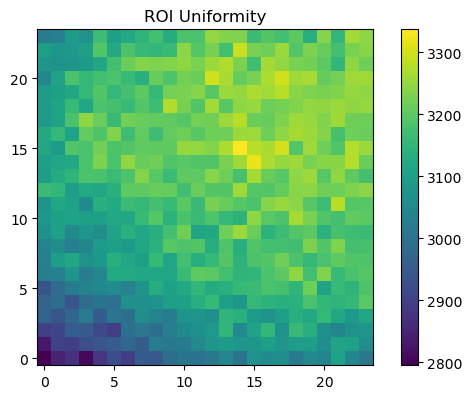

ROI Uniformity: 2.834224605012612 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 349.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09384527802467346
Exposure set to 0.09384500235319138 (err of 2.743105236013843e-07
Trial 1:
Imaging with Exposure: 0.09384500235319138 s
+Good exposure 0.09384500235319138 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.09384500235319138
Exposure Value set to 0.015015200711786747
Exposure set to 0.01501499954611063 (err of 2.008303999906369e-07
Trial 2:
Imaging with Exposure: 0.01501499954611063 s
+Good exposure 0.01501499954611063 Image recieved
Quantile: 2494.0, Target: 3275.2000000000003
Expo

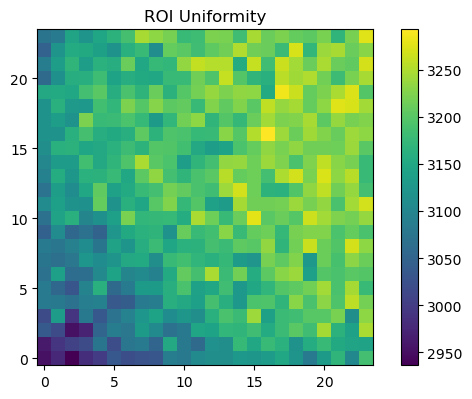

ROI Uniformity: 1.9659276247795716 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3850.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.001701402710750699
Exposure set to 0.0017010000301524997 (err of 4.026480623848302e-07
Trial 1:
Imaging with Exposure: 0.0017010000301524997 s
+Good exposure 0.0017010000301524997 Image recieved
Quantile: 3284.0, Target: 3275.2000000000003
Exposure current Value: 0.0017010000301524997
Exposure Value set to 0.0016964419046416879
Exposure set to 0.0016959999920800328 (err of 4.419381134711329e-07
Trial 2:
Imaging with Exposure: 0.0016959999920800328 s
+Good exposure 0.0016959999920800328 Image recieved
Quantile: 3237.0, Target: 3275.

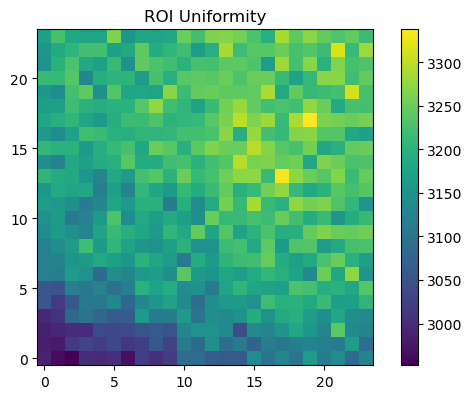

ROI Uniformity: 2.064101844275158 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [6]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\0_650\650_72us

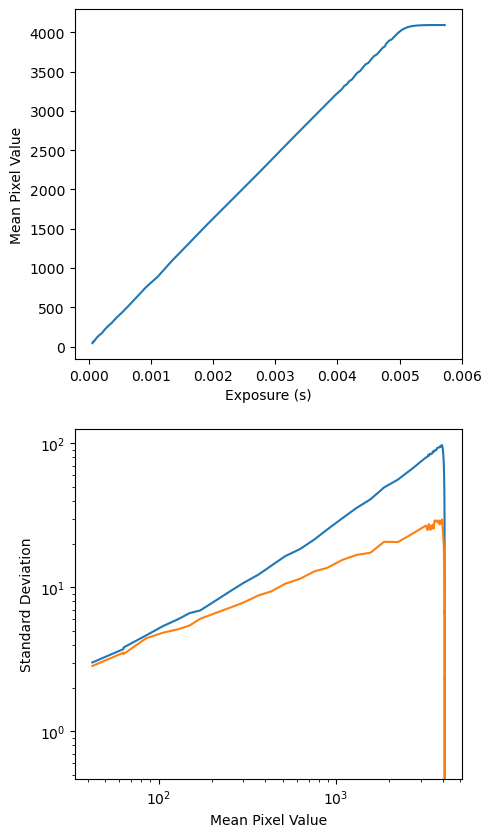

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\1_475\475_72us

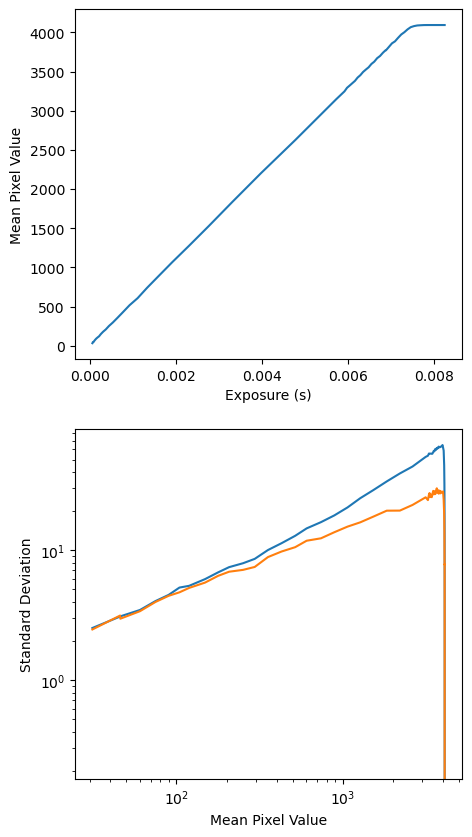

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\2_550\550_72us

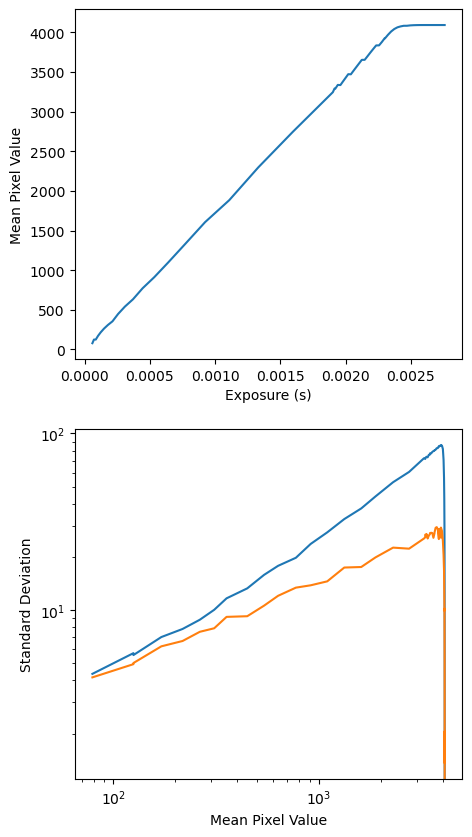

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\3_400\400_72us

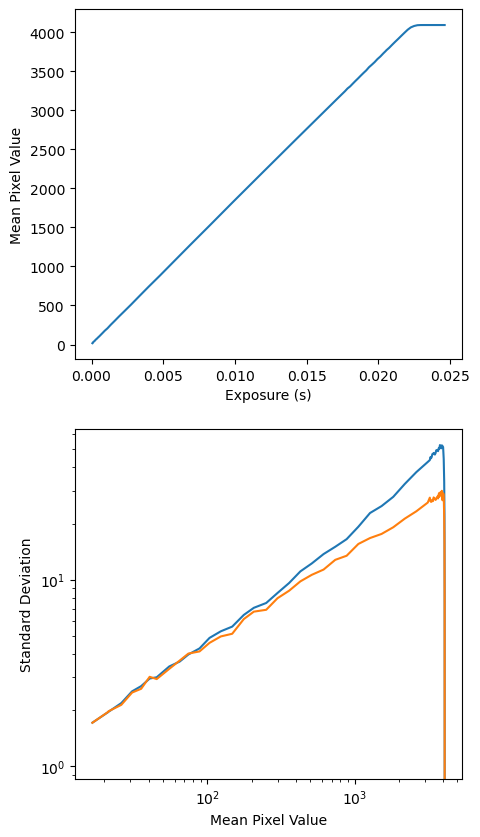

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\4_725\725_72us

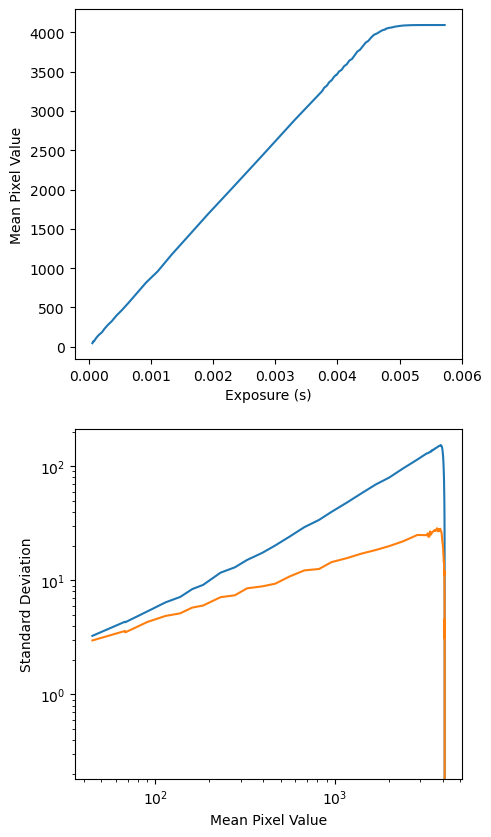

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\5_850\850_72us

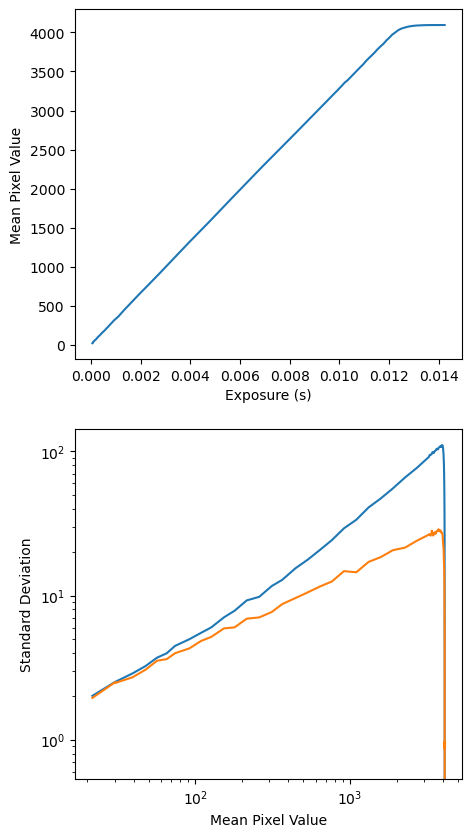

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\7_950\950_72us

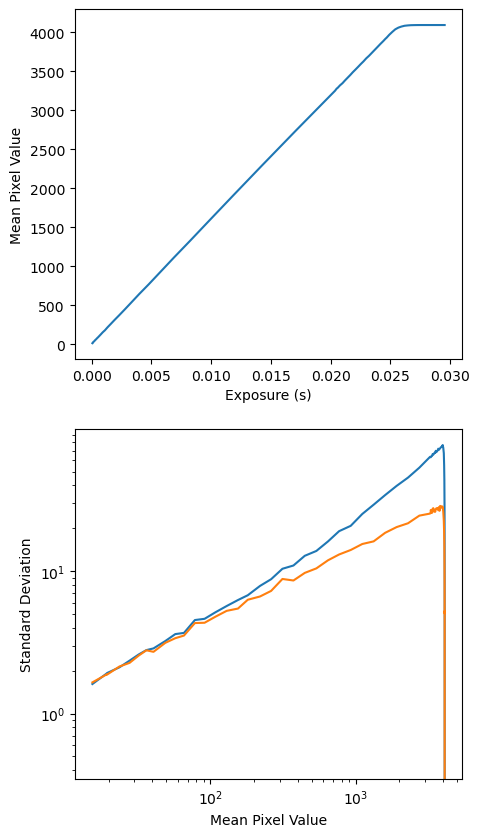

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\6_550\550_72us

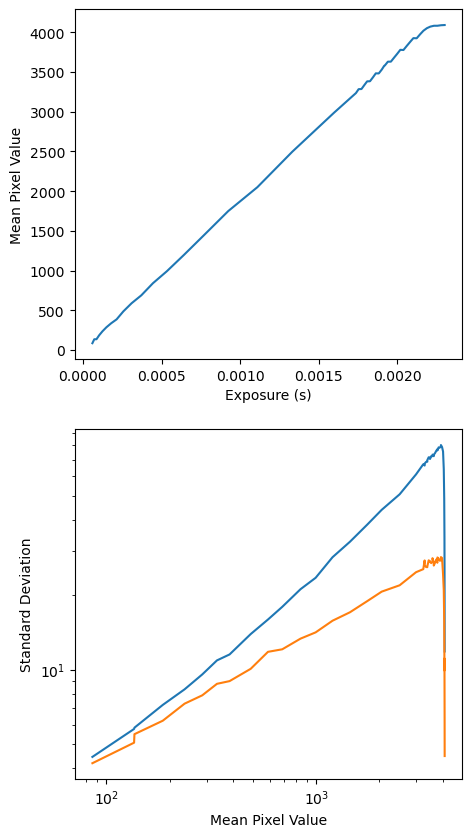

In [7]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 101.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.32427725195884705
Exposure set to 0.32427701354026794 (err of 2.295848461897343e-07
Trial 1:
Imaging with Exposure: 0.32427701354026794 s
+Good exposure 0.32427701354026794 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.32427701354026794
Exposure Value set to 0.05188432335853577
Exposure set to 0.0518839992582798 (err of 3.229081630695685e-07
Trial 2:
Imaging with Exposure: 0.0518839992582798 s
+Good exposure 0.0518839992582798 Image recieved
Quantile: 2322.0, Target: 3275.2000000000003
Exposure current Value: 0.0518839992582798
Exposure Value set to 0.0731828063726

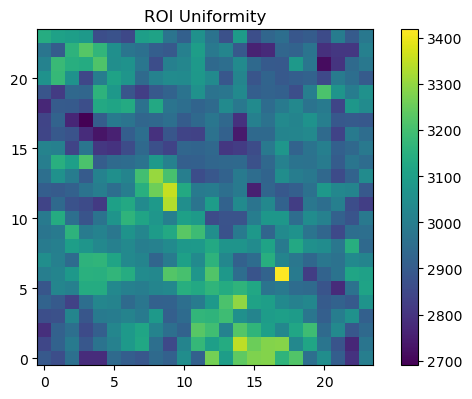

ROI Uniformity: 3.762592504555581 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 70.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.46788573265075684
Exposure set to 0.46788498759269714 (err of 7.489163960650025e-07
Trial 1:
Imaging with Exposure: 0.46788498759269714 s
+Good exposure 0.46788498759269714 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.46788498759269714
Exposure Value set to 0.07486160099506378
Exposure set to 0.07486099749803543 (err of 6.00516796109285e-07
Trial 2:
Imaging with Exposure: 0.07486099749803543 s
+Good exposure 0.07486099749803543 Image recieved
Quantile: 2205.0, Target: 3275.2000000000003
Exposur

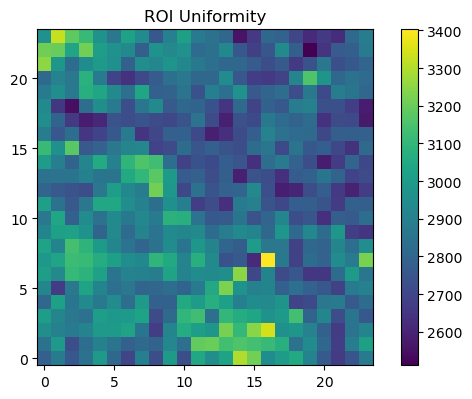

ROI Uniformity: 5.038112094674628 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 202.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.16213862597942352
Exposure set to 0.16213800013065338 (err of 6.214319036856875e-07
Trial 1:
Imaging with Exposure: 0.16213800013065338 s
+Good exposure 0.16213800013065338 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.16213800013065338
Exposure Value set to 0.025942079722881317
Exposure set to 0.0259419996291399 (err of 8.039176464108566e-08
Trial 2:
Imaging with Exposure: 0.0259419996291399 s
+Good exposure 0.0259419996291399 Image recieved
Quantile: 2462.0, Target: 3275.2000000000003
Exposur

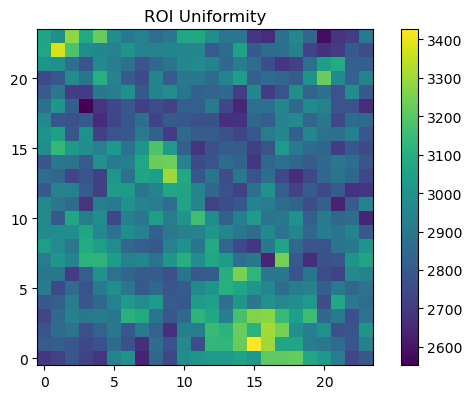

ROI Uniformity: 4.610820161132899 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 32.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 1.0235000848770142
Exposure set to 1.0234999656677246 (err of 8.294591680169106e-08
Trial 1:
Imaging with Exposure: 1.0234999656677246 s
+Good exposure 1.0234999656677246 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.0234999656677246
Exposure Value set to 0.1637599915266037
Exposure set to 0.1637589931488037 (err of 1.0013580322432158e-06
Trial 2:
Imaging with Exposure: 0.1637589931488037 s
+Good exposure 0.1637589931488037 Image recieved
Quantile: 1626.0, Target: 3275.2000000000003
Exposure curre

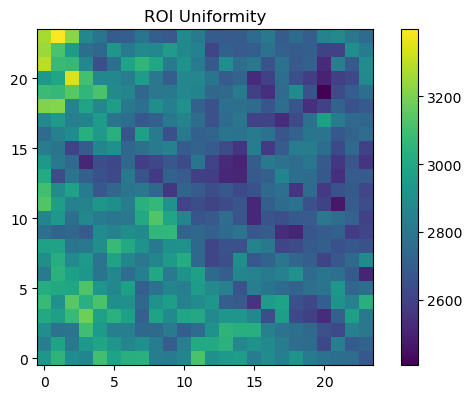

ROI Uniformity: 5.3731978259029445 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 110.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.2977454662322998
Exposure set to 0.2977449893951416 (err of 4.792924631624729e-07
Trial 1:
Imaging with Exposure: 0.2977449893951416 s
+Good exposure 0.2977449893951416 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2977449893951416
Exposure Value set to 0.04763919860124588
Exposure set to 0.04763900116086006 (err of 1.9714236259432694e-07
Trial 2:
Imaging with Exposure: 0.04763900116086006 s
+Good exposure 0.04763900116086006 Image recieved
Quantile: 2385.0, Target: 3275.2000000000003
Exposure

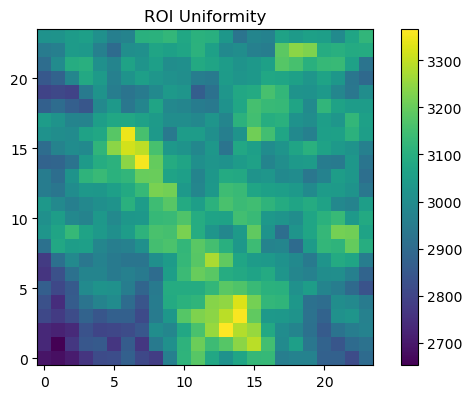

ROI Uniformity: 3.7061816811579775 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 51.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.6421961188316345
Exposure set to 0.642195999622345 (err of 1.0931170457695316e-07
Trial 1:
Imaging with Exposure: 0.642195999622345 s
-Bad exposure 0.642195999622345 No image recieved in 5000 ms
Quantile: 1.0, Target: 3275.2000000000003
Exposure current Value: 0.642195999622345
Exposure Value set to 0.9632940292358398
Exposure set to 0.9632940292358398 (err of -2.9802322387695312e-08
Trial 2:
Imaging with Exposure: 0.9632940292358398 s
+Good exposure 0.9632940292358398 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Expos

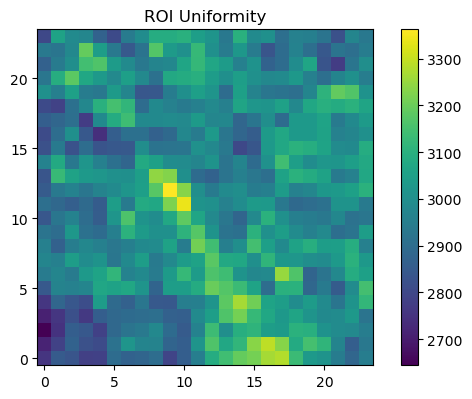

ROI Uniformity: 3.4687844803590213 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 33.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.9924848675727844
Exposure set to 0.9924839735031128 (err of 9.221222365685122e-07
Trial 1:
Imaging with Exposure: 0.9924839735031128 s
+Good exposure 0.9924839735031128 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.9924839735031128
Exposure Value set to 0.15879744291305542
Exposure set to 0.1587969958782196 (err of 4.398822784357215e-07
Trial 2:
Imaging with Exposure: 0.1587969958782196 s
+Good exposure 0.1587969958782196 Image recieved
Quantile: 1656.0, Target: 3275.2000000000003
Exposure curr

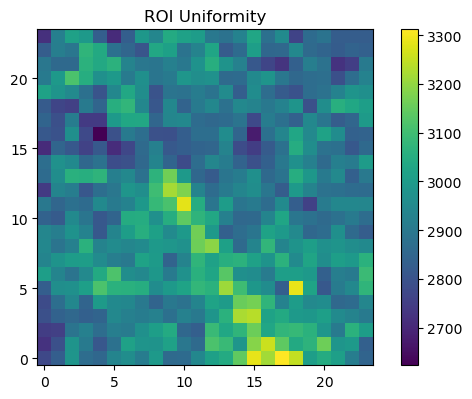

ROI Uniformity: 3.513231851235649 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 206.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.1589902937412262
Exposure set to 0.15898999571800232 (err of 3.0309576720677356e-07
Trial 1:
Imaging with Exposure: 0.15898999571800232 s
+Good exposure 0.15898999571800232 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.15898999571800232
Exposure Value set to 0.025438399985432625
Exposure set to 0.02543799951672554 (err of 3.9979815483204284e-07
Trial 2:
Imaging with Exposure: 0.02543799951672554 s
+Good exposure 0.02543799951672554 Image recieved
Quantile: 2466.0, Target: 3275.2000000000003
Exp

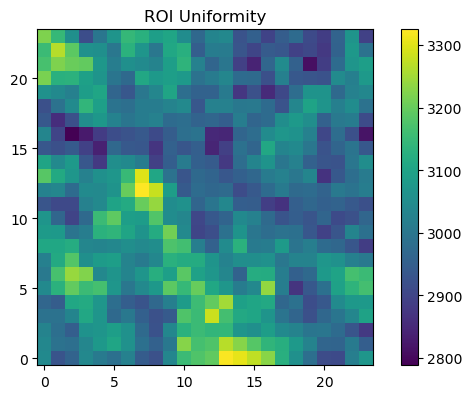

ROI Uniformity: 3.012257178494222 %
-----------------------------------


In [8]:
osc.check_channel_roi_uniformity(cameras)

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\0_650\650_72us_2_c

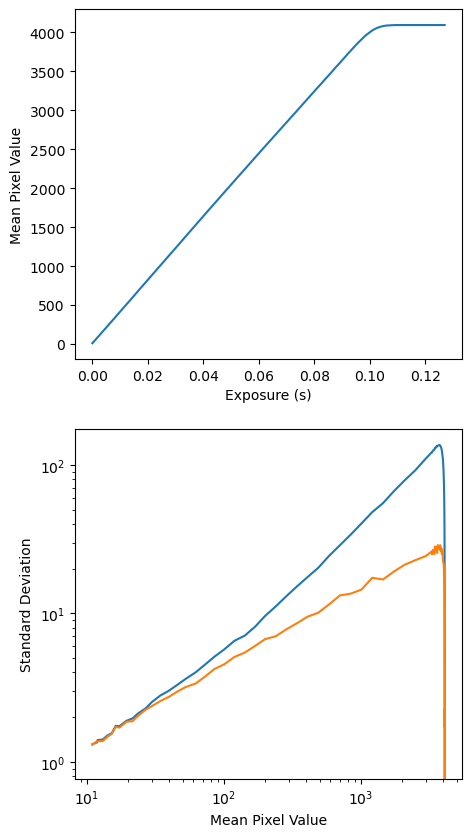

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\1_475\475_72us_2_c

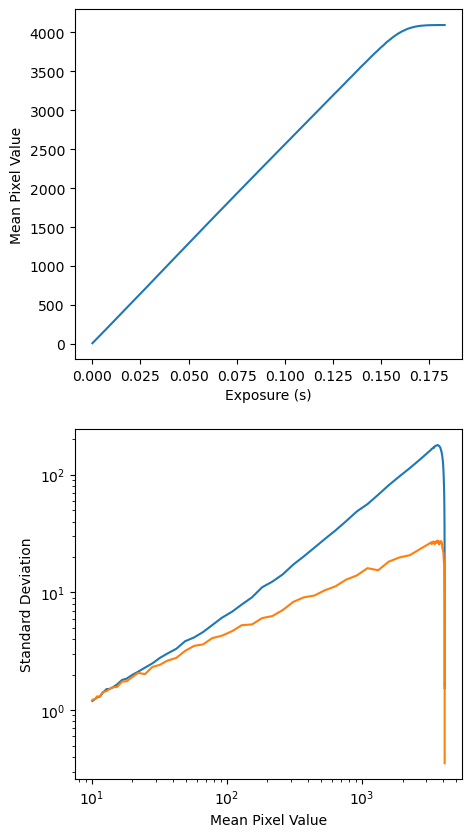

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\2_550\550_72us_2_c

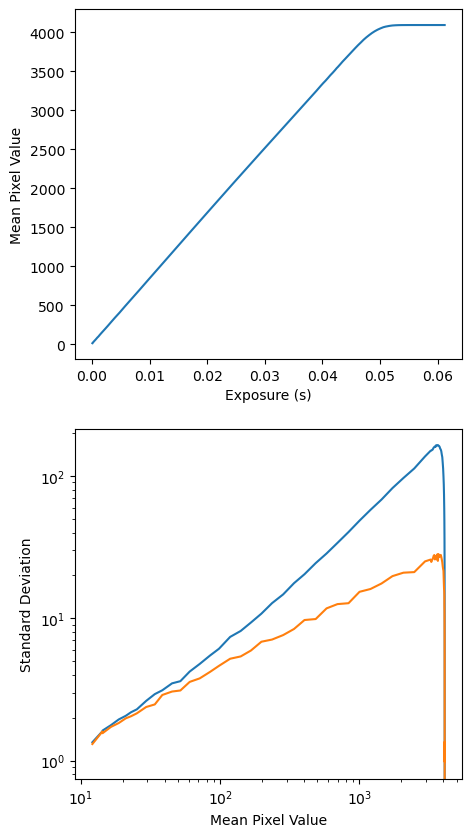

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\3_400\400_72us_2_c

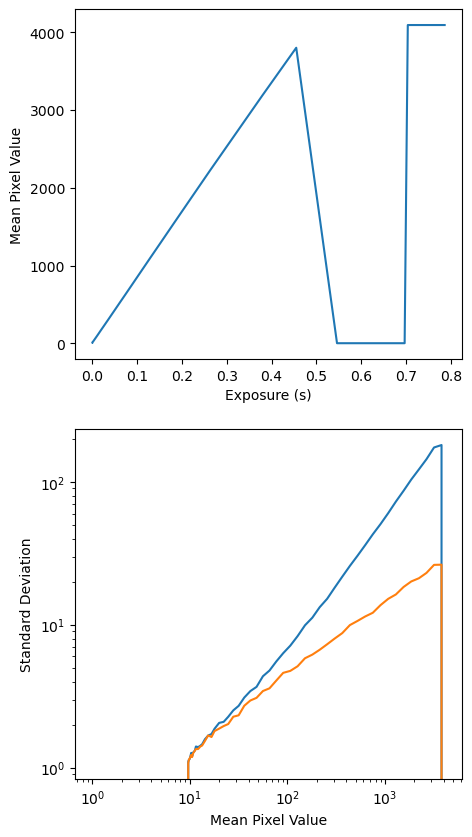

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\4_725\725_72us_2_c

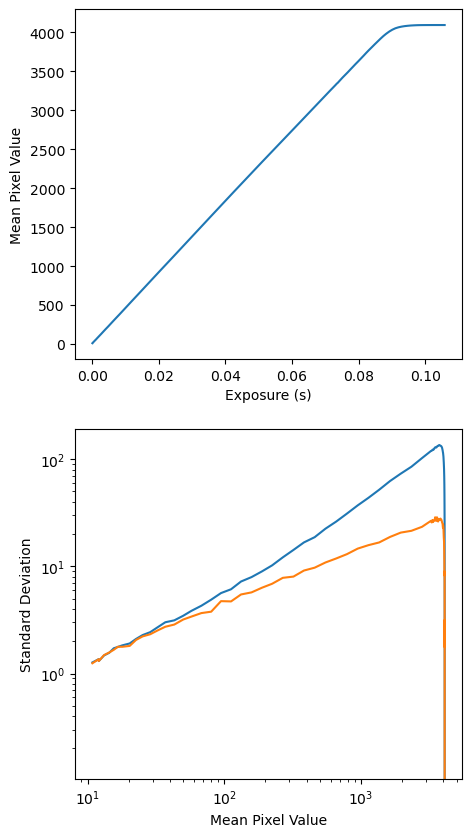

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\5_850\850_72us_2_c

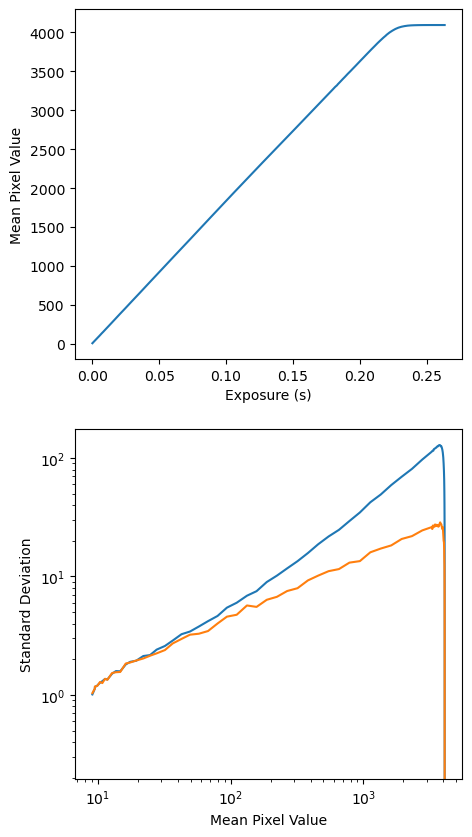

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\7_950\950_72us_2_c

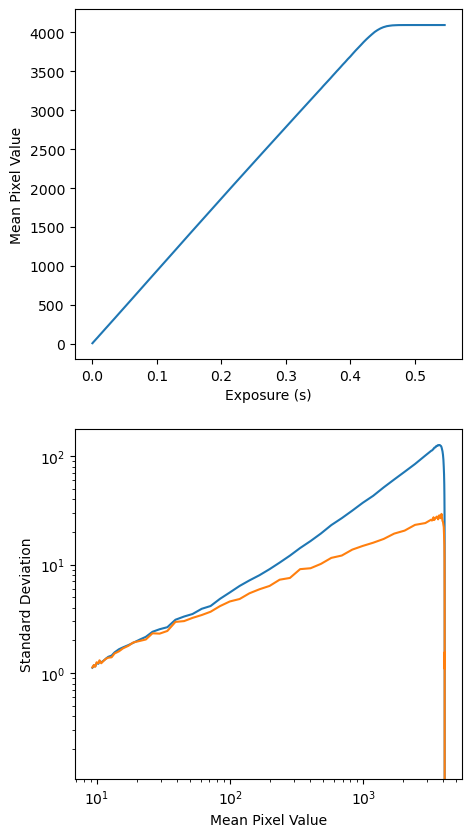

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\6_550\550_72us_2_c

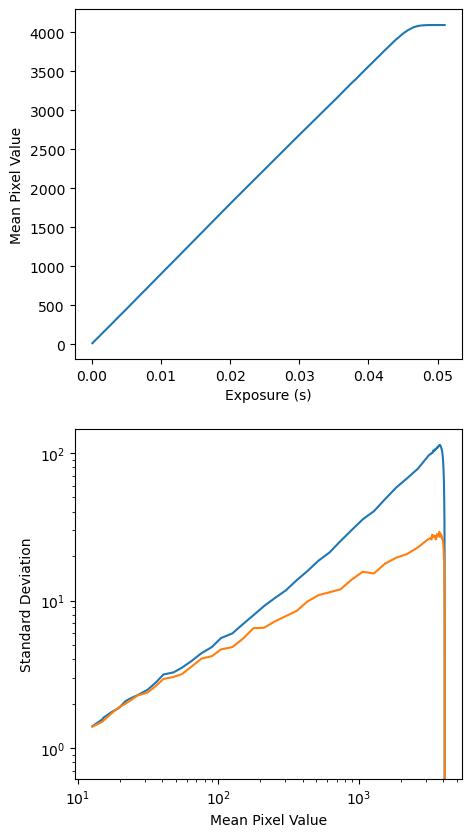

In [9]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

In [ ]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_48dB')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [ ]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99', 'drk', drk_ave)

In [ ]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5', 'drk', drk_ave)